<a href="https://colab.research.google.com/github/hleeat/AWS_Compare/blob/main/comparison_with_cpu_utilization_according_to_Instance_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 성능 비교 코드

In [ ]:
from flask import Flask, render_template
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import time
import psutil

app = Flask(__name__)
def find_social_links(url, keywords):
    # ... 기존의 find_social_links 함수 ...
    """ 주어진 URL에서 특정 키워드를 포함하는 링크를 찾아 딕셔너리로 반환합니다. """
    links = {}
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            for link in soup.find_all('a', href=True):
                full_link = urljoin(url, link['href'])
                for key in keywords:
                    if key in full_link:
                        links[key] = full_link
    except Exception as e:
        print(f"Error occurred while accessing {url}: {e}")
    return links

@app.route('/')
def show_links():
    base_urls = [
        "https://jinhyeonkwak.github.io/JinhyeonKwak/",
        "https://kkh0331.github.io/kkh0331/",
        "https://lrozlo.github.io/Lrozlo/",
        "https://eastwon0103.github.io/EastWon0103/",
        "https://allllfo.github.io/allllfo/",
        "https://bkkmw.github.io/bkkmw/",
        "https://lvolzdev.github.io/lvolzdev/",
        "https://kimyoungseok15.github.io/kimyoungseok15/",
        "https://rlafl7942.github.io/rlafl7942/",
        "https://youhyeoneee.github.io/youhyeoneee/",
        "https://jkl0124.github.io/jkl0124/",
        "https://seohee99.github.io/seohee99/",
        "https://ye-s-rin.github.io/ye-s-rin/",
        "https://yjp8842.github.io/yjp8842/",
        "https://euics.github.io/euics/",
        "https://jiminpark23.github.io/jiminpark23/",
        "https://parkjineon.github.io/parkjineon/",
        "https://baebyeolha.github.io/baebyeolha/",
        "https://seo-yj.github.io/SEO-YJ/",
        "https://tomk2d.github.io/Tomk2d/",
        "https://eunxoo.github.io/eunxoo/",
        "https://sjjuunny.github.io/SJJuunnY/",
        "https://yeongseoyoo.github.io/YeongseoYoo/",
        "https://gundolflee.github.io/gundolflee/",
        "https://sjun516.github.io/sjun516/",
        "https://godltjsdud.github.io/godltjsdud/",
        "https://seungtoctoc.github.io/seungtoctoc/",
        "https://eehanseul.github.io/eehanseul/",
        "https://hleeat.github.io/hleeat/",
        "https://github.com/NOEL-code/WOO_SUNG/",
        "https://chanjin1998.github.io/chanjin1998/",
        "https://chaeheonjeong.github.io/chaeheonjeong/",
        "https://heeeesoo.github.io/heeeesoo/",
        "https://ekgus9701.github.io/ekgus9701/",
        "https://beomseok37.github.io/beomseok37/",
        "https://bookeers.github.io/bookeers/"
    # ... 나머지 URL들 ...
    ]  # 예시 URL
    keywords = ['instagram', 'blog', 'linkedin', 'gmail']
    all_links=[]

    # CPU 사용량 및 시간 측정 시작
    start_time = time.time()
    initial_cpu_time = psutil.cpu_percent(interval=None)
    for base_url in base_urls:
        social_links = find_social_links(base_url, keywords)
        links_str = ', '.join([f"{k}: {v}" for k, v in social_links.items()])
        all_links.append(f"Social links for {base_url}: {links_str}")

    # 작업 종료 시간 및 최종 CPU 사용량 기록
    end_time = time.time()
    final_cpu_time = psutil.cpu_percent(interval=None)

    # 경과 시간 및 평균 CPU 사용량 계산
    elapsed_time = end_time - start_time
    average_cpu_utilization = (final_cpu_time + initial_cpu_time) / 2
    all_links.append(f"Start time: {start_time}, End time: {end_time}<br>Elapsed time: {elapsed_time} seconds<br>Average CPU utilization: {average_cpu_utilization}%")
    return '<br>'.join(all_links)

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

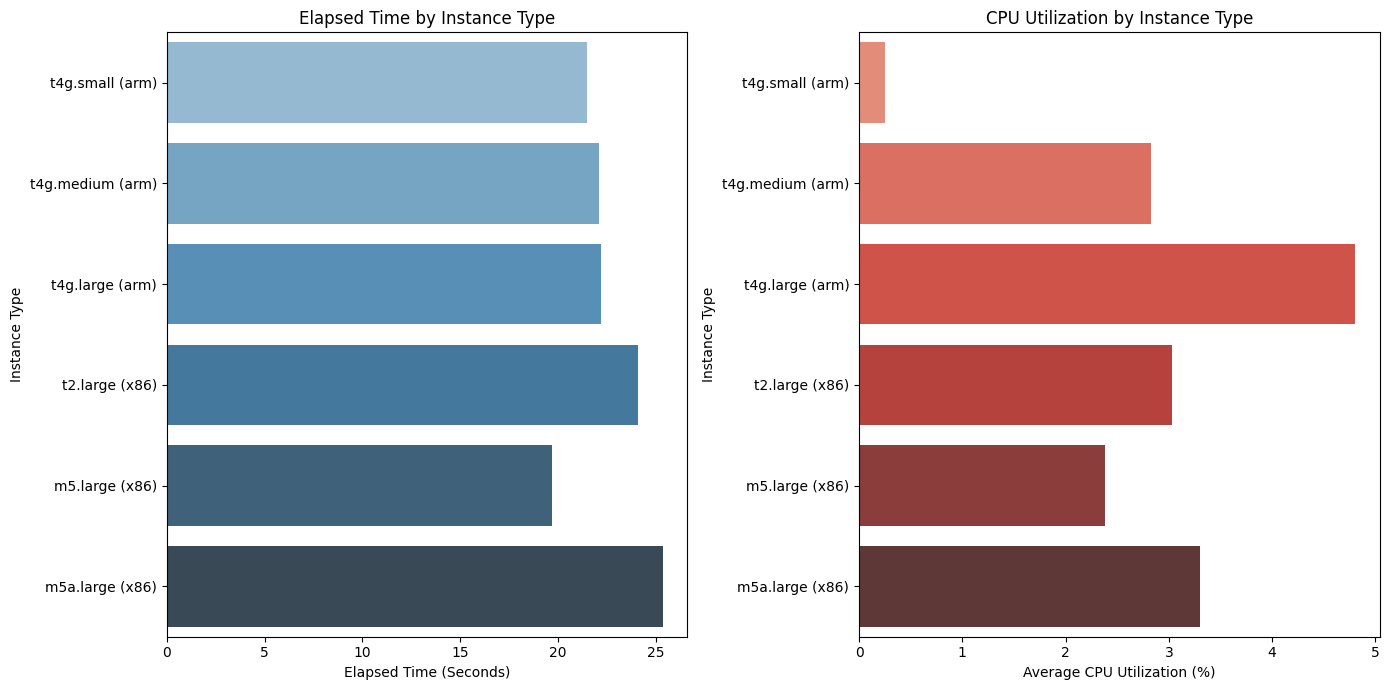

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 프레임 생성
df = pd.DataFrame({
    "Instance Type": ["t4g.small (arm)", "t4g.medium (arm)", "t4g.large (arm)",
                      "t2.large (x86)", "m5.large (x86)", "m5a.large (x86)"],
    "Elapsed Time (seconds)": [21.475, 22.069, 22.181, 24.075, 19.662, 25.336],
    "Average CPU Utilization (%)": [0.25, 2.83, 4.803, 3.034, 2.378, 3.3]
})

# 데이터 시각화
plt.figure(figsize=(14, 7))

# Elapsed Time 그래프
plt.subplot(1, 2, 1)
sns.barplot(x="Elapsed Time (seconds)", y="Instance Type", data=df, palette="Blues_d")
plt.title("Elapsed Time by Instance Type")
plt.xlabel("Elapsed Time (Seconds)")
plt.ylabel("Instance Type")

# CPU Utilization 그래프
plt.subplot(1, 2, 2)
sns.barplot(x="Average CPU Utilization (%)", y="Instance Type", data=df, palette="Reds_d")
plt.title("CPU Utilization by Instance Type")
plt.xlabel("Average CPU Utilization (%)")
plt.ylabel("Instance Type")

# 그래프 표시
plt.tight_layout()
plt.show()

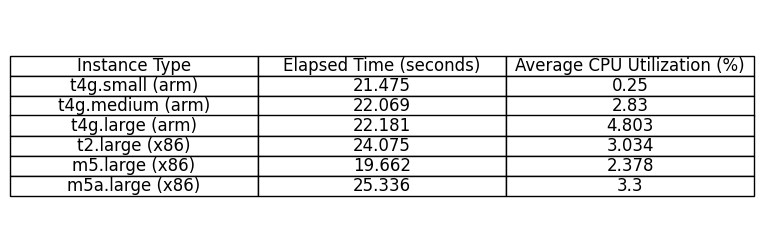

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# 데이터 프레임 생성
df = pd.DataFrame({
    "Instance Type": ["t4g.small (arm)", "t4g.medium (arm)", "t4g.large (arm)",
                      "t2.large (x86)", "m5.large (x86)", "m5a.large (x86)"],
    "Elapsed Time (seconds)": [21.475, 22.069, 22.181, 24.075, 19.662, 25.336],
    "Average CPU Utilization (%)": [0.25, 2.83, 4.803, 3.034, 2.378, 3.3]
})

# 표를 그림으로 생성
fig, ax = plt.subplots(figsize=(8, 3))  # 표의 크기 조정
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values, colLabels=df.columns, loc="center", cellLoc='center')

# 테이블 셀 크기 조정
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1.2, 1.2)

plt.show()


## 실행 시간 (Elapsed Time):
빠름: m5.large (x86)는 가장 짧은 실행 시간을 기록했습니다. 즉, 주어진 작업을 완료하는 데 가장 적은 시간이 소요되었다는 것을 의미합니다. 이는 일반적으로 좋은 성능을 나타내며, 이 인스턴스가 작업을 처리하는 데 가장 효율적이었을 가능성이 높습니다.
느림: m5a.large (x86)는 가장 긴 실행 시간을 보여줍니다. 이는 이 인스턴스가 작업을 완료하는 데 더 많은 시간이 필요했음을 나타내며, 같은 작업을 수행함에 있어 상대적으로 성능이 낮을 수 있음을 의미합니다.

## CPU 사용률 (Average CPU Utilization):
낮음: t4g.small (arm)은 0.25%의 매우 낮은 CPU 사용률을 보여주었습니다. 이는 이 인스턴스가 CPU 자원을 거의 사용하지 않았거나, CPU 요구 사항이 매우 낮은 작업을 수행했을 가능성이 있습니다.
높음: t4g.large (arm)는 비교적 높은 CPU 사용률을 기록했습니다. 이는 이 인스턴스가 주어진 작업을 수행하는 데 많은 CPU 자원을 사용했음을 나타냅니다. 그러나 실행 시간이 빠르지 않다는 점은, 높은 CPU 사용량이 반드시 빠른 처리 속도로 이어지지 않을 수 있음을 보여줍니다.

## CPU 아키텍처의 영향:
ARM 기반 인스턴스(t4g 시리즈)와 x86 기반 인스턴스(t2, m5, m5a 시리즈) 간에는 성능과 효율성 면에서 차이가 있습니다. 예를 들어, ARM 인스턴스는 낮은 CPU 사용률을 보이는 반면, t2.large (x86)는 더 높은 사용률을 나타냅니다. 이는 아키텍처별로 최적화된 작업 유형이 다를 수 있음을 시사합니다.

##성능 대비 비용:
실제 비용 대비 성능을 평가하려면, 인스턴스의 시간당 가격과 다른 리소스 사용량도 함께 고려해야 합니다. 낮은 CPU 사용률과 긴 실행 시간을 보이는 인스턴스는 비용 효율적이지 않을 수 있으며, 반대로 짧은 실행 시간과 적당한 CPU 사용률을 가진 인스턴스는 더 효율적일 수 있습니다.

#

결론적으로, 이 데이터를 통해 각 인스턴스 유형이 특정 작업에 얼마나 적합한지, 그리고 효율성과 비용 대비 성능을 어떻게 평가해야 하는지에 대한 인사이트를 얻을 수 있습니다. 그러나 이러한 관찰 사항은 인스턴스의 비용, 다른 리소스 사용률, 그리고 특정 워크로드의 특성을 충분히 고려할 때만 완전한 의미를 가질 수 있습니다.





